## Library Function Import

In [219]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Dataset Import

In [116]:
df = pd.read_csv('D:/Programing/laptop-price-predictor/data/laptops.csv')

In [29]:
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [73]:
df.shape # checking dataset size

(2160, 12)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2160 entries, 0 to 2159
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Laptop        2160 non-null   object 
 1   Status        2160 non-null   object 
 2   Brand         2160 non-null   object 
 3   Model         2160 non-null   object 
 4   CPU           2160 non-null   object 
 5   RAM           2160 non-null   int64  
 6   Storage       2160 non-null   int64  
 7   Storage type  2118 non-null   object 
 8   GPU           789 non-null    object 
 9   Screen        2156 non-null   float64
 10  Touch         2160 non-null   object 
 11  Final Price   2160 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 202.6+ KB


In [75]:
df.duplicated().sum() # checking for duplicate values

0

In [77]:
df.isnull().sum() # checking for null values

Laptop             0
Status             0
Brand              0
Model              0
CPU                0
RAM                0
Storage            0
Storage type      42
GPU             1371
Screen             4
Touch              0
Final Price        0
dtype: int64

## Preprcessing

In [118]:
df.drop(columns=['Laptop', 'Status',], inplace=True) # removeing Laptop & Status column
df.head()

,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


**Handling Missing Values**

In [120]:
df['GPU'] = df['GPU'].fillna("None") # replacing NULL values of GPU column with 'NONE' string.
df['Storage type'] = df['Storage type'].fillna("HDD") # replacing NULL values of Storage type column with default 'HDD'.
df['Screen'] = df['Screen'].fillna(15.6) # replacing NULL values of Screen column with '15.6).
df.head()

,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,Asus,ExpertBook,Intel Core i5,8,512,SSD,None,15.6,No,1009.00
1,Alurin,Go,Intel Celeron,8,256,SSD,None,15.6,No,299.00
2,Asus,ExpertBook,Intel Core i3,8,256,SSD,None,15.6,No,789.00
3,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP,15S,Intel Core i5,16,512,SSD,None,15.6,No,669.01


In [122]:
df.isnull().sum()

Brand           0
Model           0
CPU             0
RAM             0
Storage         0
Storage type    0
GPU             0
Screen          0
Touch           0
Final Price     0
dtype: int64

# EDA (Exploratory data analysis)

<Axes: xlabel='Final Price', ylabel='Count'>

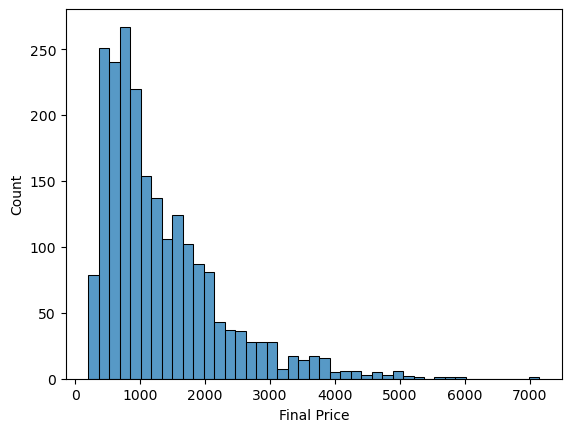

In [161]:
sns.histplot(df['Final Price'])

<Axes: xlabel='Brand'>

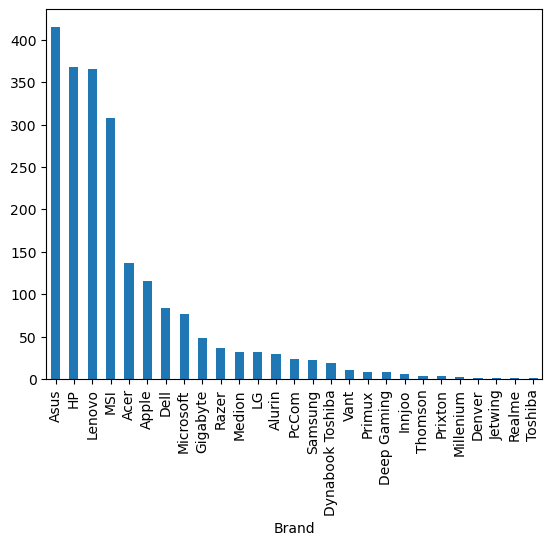

In [167]:
df['Brand'].value_counts().plot(kind='bar')

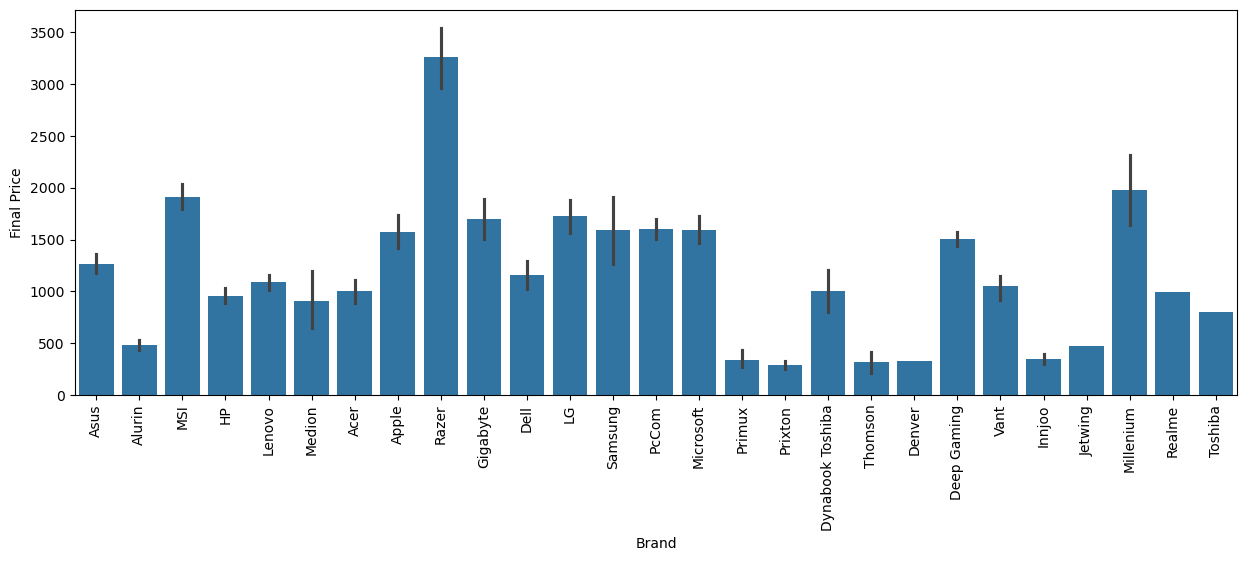

In [263]:
plt.figure(figsize=(15,5))
sns.barplot(x=df['Brand'], y=df['Final Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='Model'>

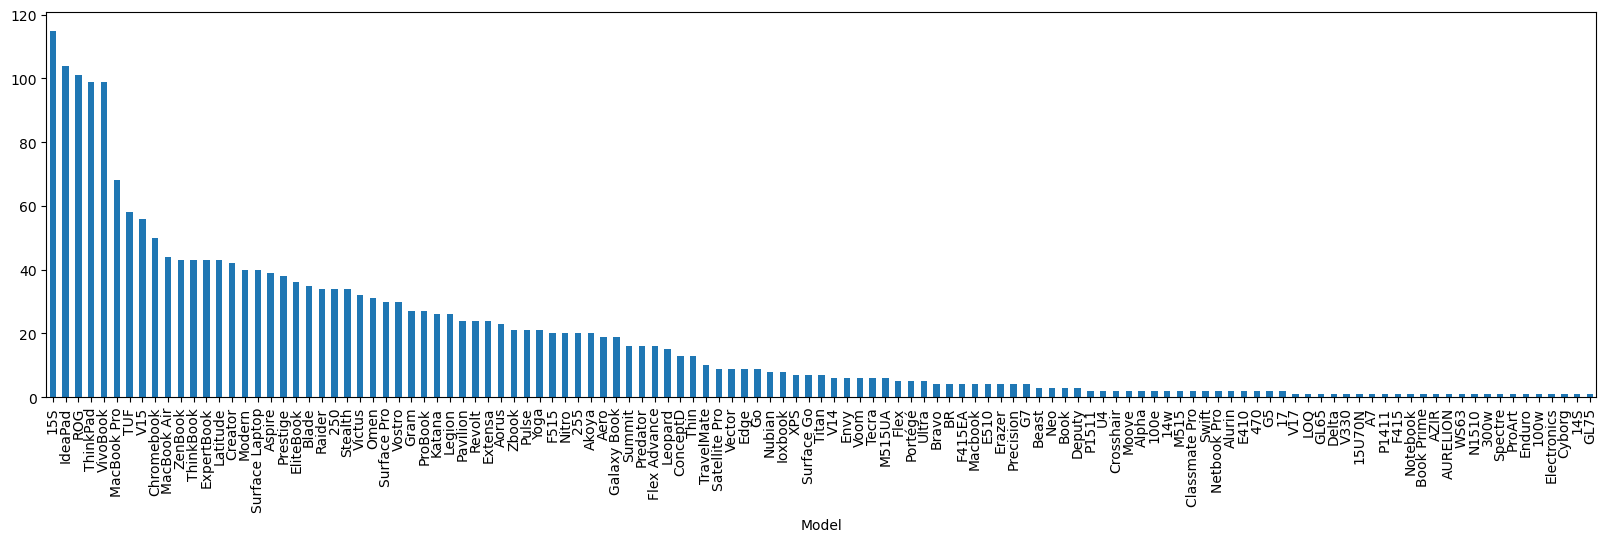

In [181]:
df['Model'].value_counts().plot(kind='bar', figsize=(20,5))

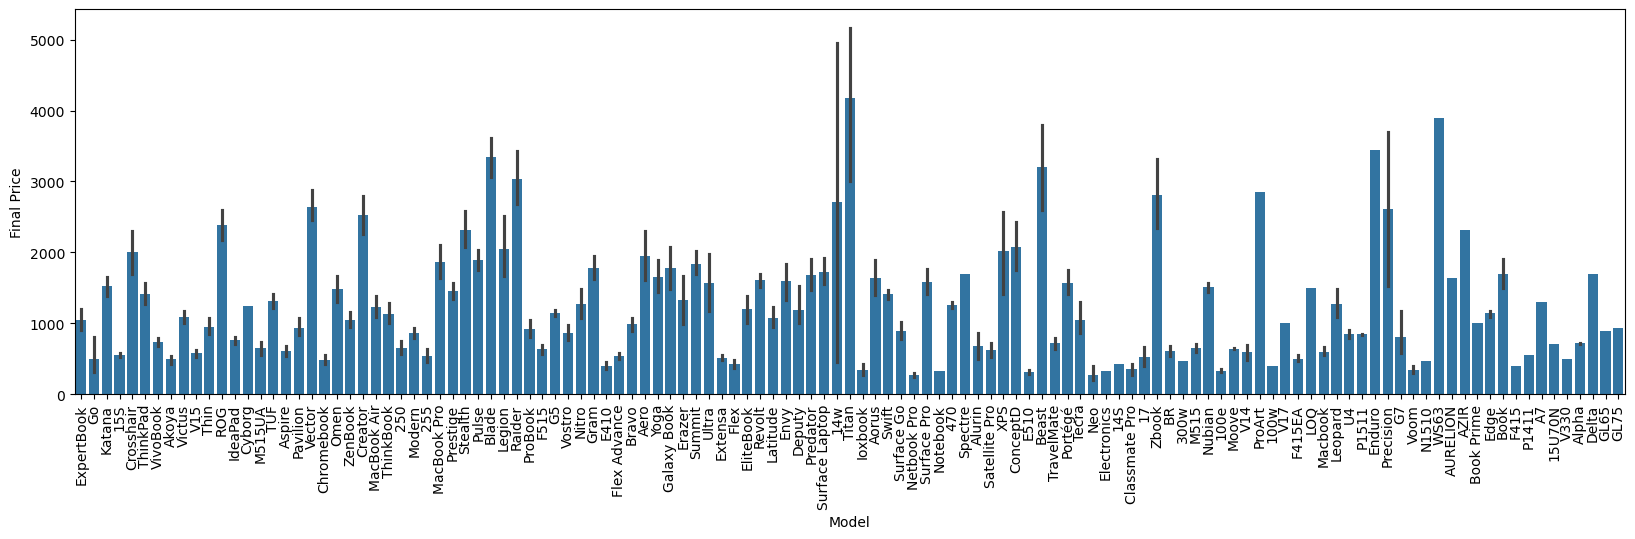

In [267]:
plt.figure(figsize=(20,5))
sns.barplot(x=df['Model'], y=df['Final Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='CPU'>

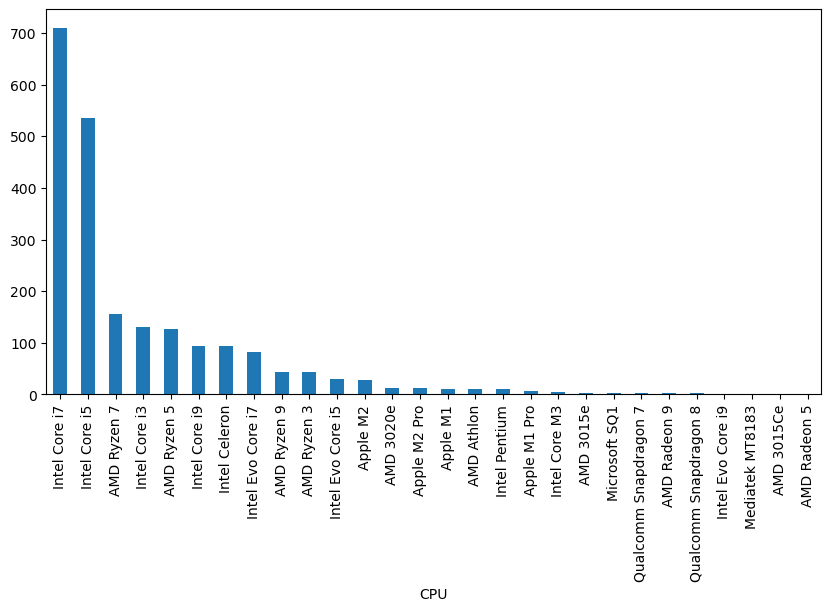

In [187]:
df['CPU'].value_counts().plot(kind='bar', figsize=(10,5))

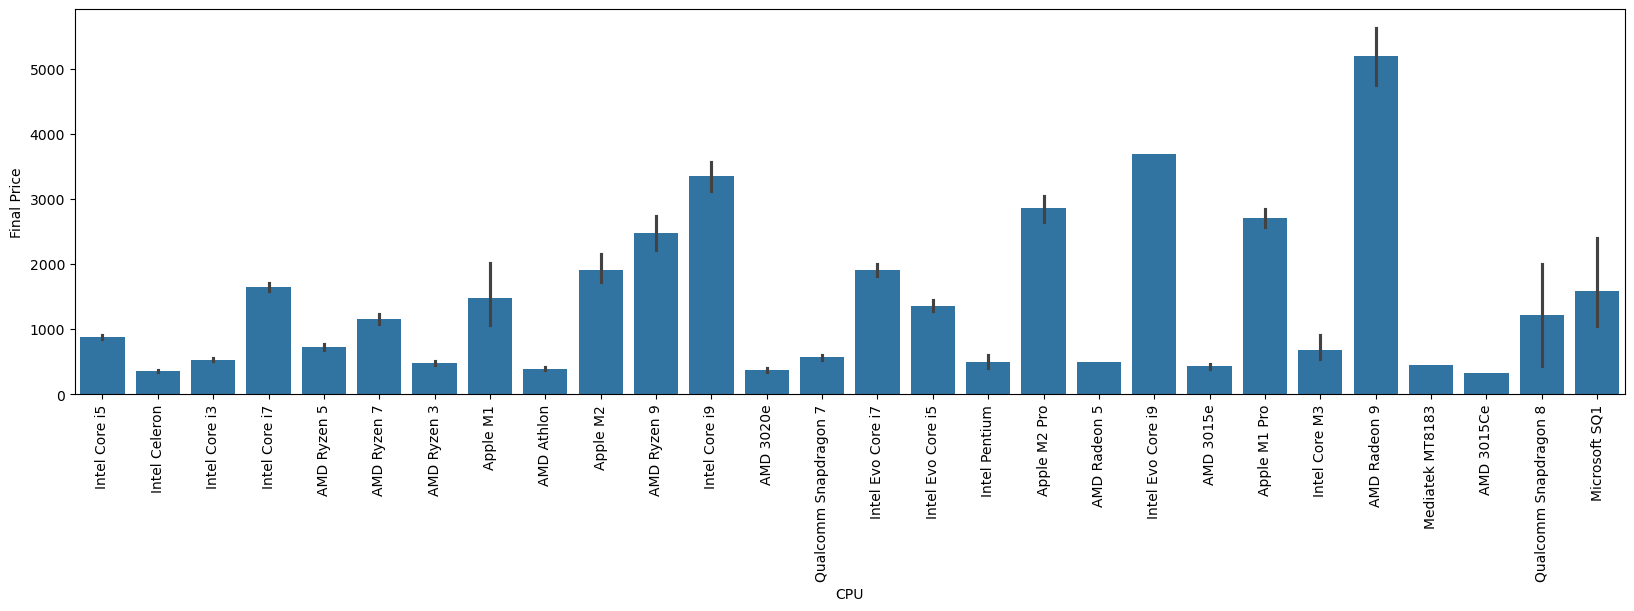

In [271]:
plt.figure(figsize=(20,5))
sns.barplot(x=df['CPU'], y=df['Final Price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='GPU'>

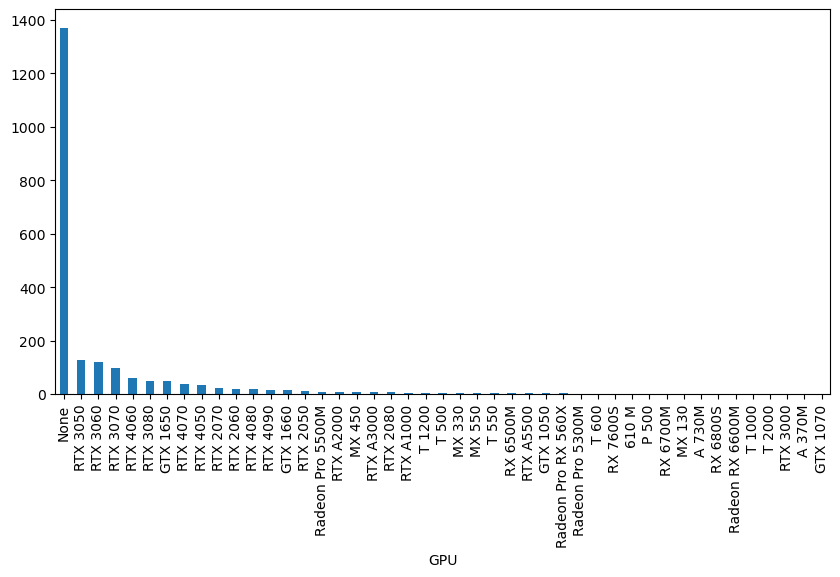

In [211]:
df['GPU'].value_counts().plot(kind='bar', figsize=(10,5))

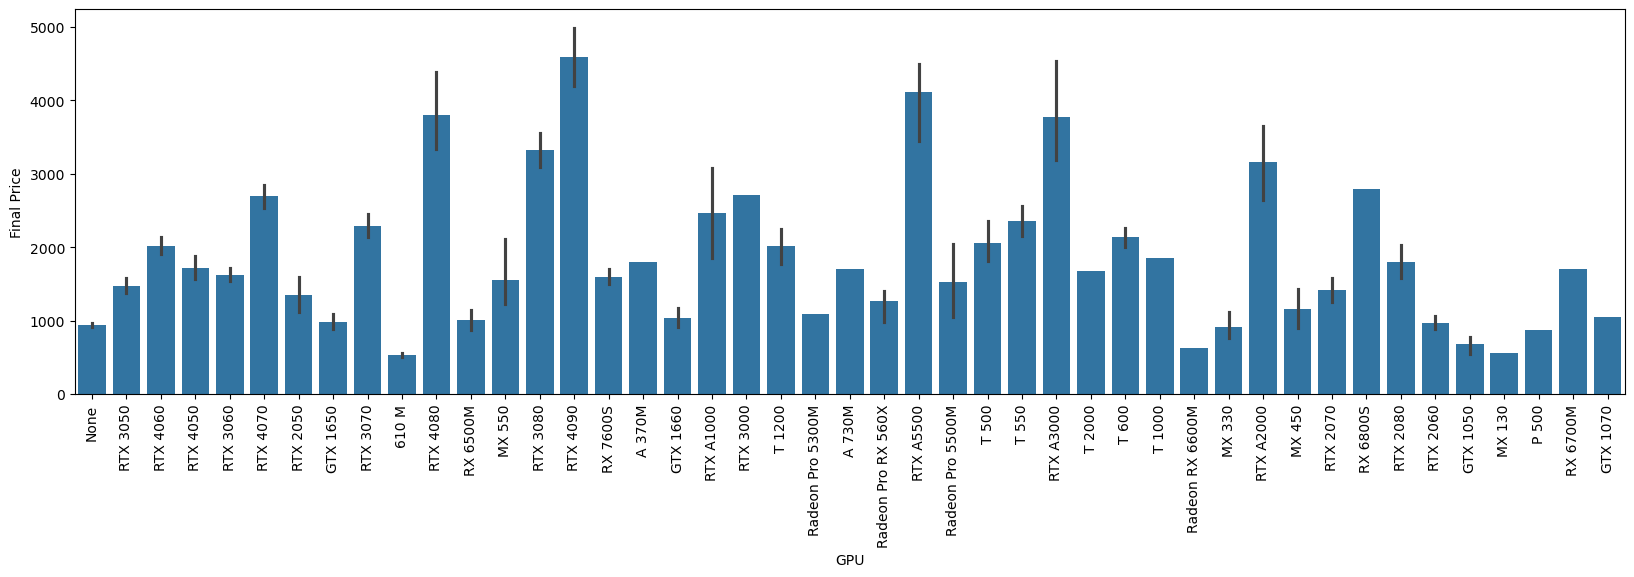

In [269]:
plt.figure(figsize=(20,5))
sns.barplot(x=df['GPU'], y=df['Final Price'])
plt.xticks(rotation='vertical')
plt.show()

In [205]:
print(df['RAM'].value_counts())
print(df['Storage'].value_counts())
print(df['Storage type'].value_counts())
print(df['Touch'].value_counts())

RAM
16     928
8      817
32     301
4       68
64      25
12      15
6        3
40       2
128      1
Name: count, dtype: int64
Storage
512     941
1000    570
256     450
128      67
2000     42
500      37
64       35
32       14
0         1
4000      1
3000      1
240       1
Name: count, dtype: int64
Storage type
SSD     2062
eMMC      56
HDD       42
Name: count, dtype: int64
Touch
No     1933
Yes     227
Name: count, dtype: int64


<Axes: xlabel='RAM', ylabel='Final Price'>

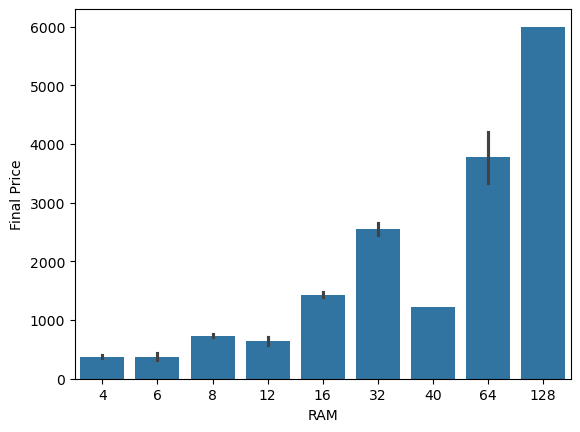

In [247]:
sns.barplot(x=df['RAM'], y=df['Final Price'])

<Axes: xlabel='Screen', ylabel='Density'>

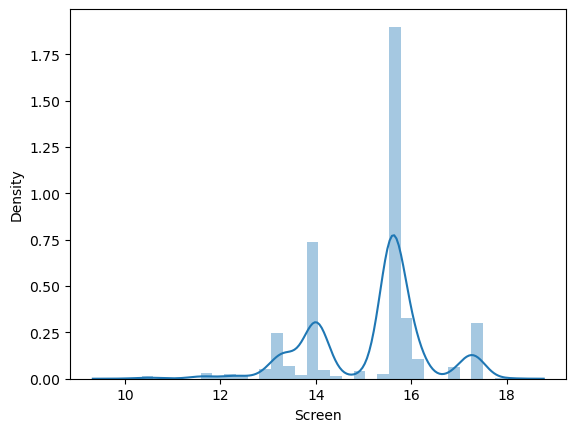

In [275]:
sns.distplot(df['Screen'])

<Axes: xlabel='Screen', ylabel='Final Price'>

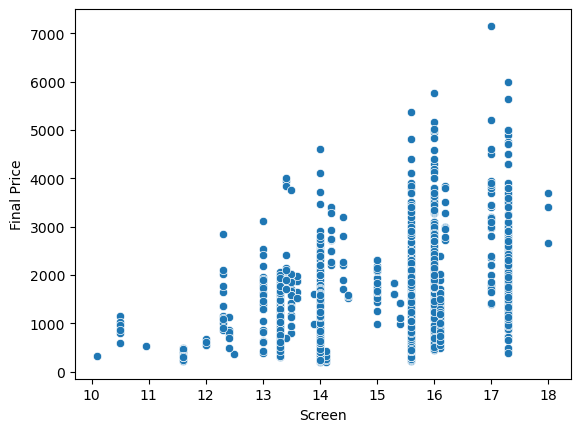

In [277]:
sns.scatterplot(x=df['Screen'], y=df['Final Price'])

In [279]:
df.head()

,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,Asus,ExpertBook,Intel Core i5,8,512,SSD,None,15.6,No,1009.00
1,Alurin,Go,Intel Celeron,8,256,SSD,None,15.6,No,299.00
2,Asus,ExpertBook,Intel Core i3,8,256,SSD,None,15.6,No,789.00
3,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP,15S,Intel Core i5,16,512,SSD,None,15.6,No,669.01
